# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Step1: Loading Dataset

In [3]:
# Load dataset
df_raw = pd.read_csv("REF.csv")
df_raw

,Unnamed: 0,REF_U_1,REF_U_2,REF_U_3,REF_tau_11,REF_tau_12,REF_tau_13,REF_tau_22,REF_tau_23,REF_tau_33,...,REF_tauplus_22,REF_tauplus_23,REF_tauplus_31,REF_tauplus_32,REF_tauplus_33,REF_Uplus_1,REF_Uplus_2,REF_Uplus_3,REF_yplus,Case
0,0,0.183148,5.524527e-08,0.000000e+00,8.607882e-03,-7.599257e-06,0.000000e+00,1.508704e-07,0.000000e+00,3.648287e-03,...,1.648931e-08,0.0,0.0,0.0,0.000399,0.060548,1.826393e-08,0.0,0.060548,fp_1000
1,1,0.554677,5.522239e-07,0.000000e+00,5.727882e-02,-9.240743e-05,0.000000e+00,3.399372e-06,0.000000e+00,2.366991e-02,...,3.715329e-07,0.0,0.0,0.0,0.002587,0.183375,1.825637e-07,0.0,0.183376,fp_1000
2,2,0.936817,1.724616e-06,0.000000e+00,1.533795e-01,-3.501041e-04,0.000000e+00,1.554829e-05,0.000000e+00,6.197673e-02,...,1.699343e-06,0.0,0.0,0.0,0.006774,0.309709,5.701532e-07,0.0,0.309713,fp_1000
3,3,1.329845,3.472650e-06,0.000000e+00,3.129591e-01,-1.097912e-03,0.000000e+00,7.115068e-05,0.000000e+00,1.216620e-01,...,7.776382e-06,0.0,0.0,0.0,0.013297,0.439643,1.148049e-06,0.0,0.439660,fp_1000
4,4,1.734088,5.539989e-06,0.000000e+00,5.072728e-01,-2.106934e-03,0.000000e+00,1.497585e-04,0.000000e+00,1.931306e-01,...,1.636779e-05,0.0,0.0,0.0,0.021108,0.573285,1.831505e-06,0.0,0.573321,fp_1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902807,9211,0.005959,-8.866439e-06,1.956330e-06,3.380772e-06,2.847676e-08,2.475930e-09,1.864412e-07,-1.829451e-08,3.345494e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,squareDuctAve_Re_3500
902808,9212,0.004547,-2.971654e-06,9.090173e-07,2.616207e-06,1.654386e-08,1.419062e-09,6.365150e-08,-7.552760e-09,2.102089e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,squareDuctAve_Re_3500
902809,9213,0.003354,-6.777688e-07,3.514683e-07,2.089987e-06,9.503438e-09,9.837950e-10,1.963132e-08,-2.862823e-09,1.315723e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,squareDuctAve_Re_3500
902810,9214,0.002072,-4.948563e-08,5.171945e-08,1.351600e-06,3.031013e-09,6.699116e-10,3.164032e-09,-4.900372e-10,5.482198e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,squareDuctAve_Re_3500


# Step2: Data Preprocessing

In [4]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902812 entries, 0 to 902811
Data columns (total 49 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      902812 non-null  int64  
 1   REF_U_1         902812 non-null  float64
 2   REF_U_2         902812 non-null  float64
 3   REF_U_3         902812 non-null  float64
 4   REF_tau_11      902812 non-null  float64
 5   REF_tau_12      902812 non-null  float64
 6   REF_tau_13      902812 non-null  float64
 7   REF_tau_22      902812 non-null  float64
 8   REF_tau_23      902812 non-null  float64
 9   REF_tau_33      902812 non-null  float64
 10  REF_k           902812 non-null  float64
 11  REF_a_11        902812 non-null  float64
 12  REF_a_12        902812 non-null  float64
 13  REF_a_13        902812 non-null  float64
 14  REF_a_22        902812 non-null  float64
 15  REF_a_23        902812 non-null  float64
 16  REF_a_33        902812 non-null  float64
 17  REF_b_11  

In [5]:
# Drop rows with any null values
df_cleaned = df_raw.dropna()
df_cleaned

,Unnamed: 0,REF_U_1,REF_U_2,REF_U_3,REF_tau_11,REF_tau_12,REF_tau_13,REF_tau_22,REF_tau_23,REF_tau_33,...,REF_tauplus_22,REF_tauplus_23,REF_tauplus_31,REF_tauplus_32,REF_tauplus_33,REF_Uplus_1,REF_Uplus_2,REF_Uplus_3,REF_yplus,Case
0,0,0.183148,5.524527e-08,0.0,0.008608,-0.000008,0.0,1.508704e-07,0.0,0.003648,...,1.648931e-08,0.0,0.0,0.0,0.000399,0.060548,1.826393e-08,0.0,0.060548,fp_1000
1,1,0.554677,5.522239e-07,0.0,0.057279,-0.000092,0.0,3.399372e-06,0.0,0.023670,...,3.715329e-07,0.0,0.0,0.0,0.002587,0.183375,1.825637e-07,0.0,0.183376,fp_1000
2,2,0.936817,1.724616e-06,0.0,0.153380,-0.000350,0.0,1.554829e-05,0.0,0.061977,...,1.699343e-06,0.0,0.0,0.0,0.006774,0.309709,5.701532e-07,0.0,0.309713,fp_1000
3,3,1.329845,3.472650e-06,0.0,0.312959,-0.001098,0.0,7.115068e-05,0.0,0.121662,...,7.776382e-06,0.0,0.0,0.0,0.013297,0.439643,1.148049e-06,0.0,0.439660,fp_1000
4,4,1.734088,5.539989e-06,0.0,0.507273,-0.002107,0.0,1.497585e-04,0.0,0.193131,...,1.636779e-05,0.0,0.0,0.0,0.021108,0.573285,1.831505e-06,0.0,0.573321,fp_1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,185,60.170067,5.664020e-02,0.0,14.968957,-4.315332,0.0,6.584633e+00,0.0,8.829160,...,9.371833e-01,0.0,0.0,0.0,1.256644,22.700058,2.136837e-02,0.0,687.725600,fp_4060
1554,186,60.553772,5.919544e-02,0.0,14.507311,-4.182678,0.0,6.389991e+00,0.0,8.544334,...,9.094802e-01,0.0,0.0,0.0,1.216105,22.844818,2.233237e-02,0.0,707.485000,fp_4060
1555,187,60.942444,6.188760e-02,0.0,14.014689,-4.042442,0.0,6.189920e+00,0.0,8.252177,...,8.810044e-01,0.0,0.0,0.0,1.174523,22.991450,2.334802e-02,0.0,727.809000,fp_4060
1556,188,61.335743,6.471685e-02,0.0,13.497219,-3.894517,0.0,5.986698e+00,0.0,7.937406,...,8.520800e-01,0.0,0.0,0.0,1.129722,23.139828,2.441540e-02,0.0,748.713900,fp_4060


In [6]:
# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_REF.csv", index=False)

### Reload cleaned data

In [7]:
# Load dataset
df = pd.read_csv("cleaned_REF.csv")
df

,Unnamed: 0,REF_U_1,REF_U_2,REF_U_3,REF_tau_11,REF_tau_12,REF_tau_13,REF_tau_22,REF_tau_23,REF_tau_33,...,REF_tauplus_22,REF_tauplus_23,REF_tauplus_31,REF_tauplus_32,REF_tauplus_33,REF_Uplus_1,REF_Uplus_2,REF_Uplus_3,REF_yplus,Case
0,0,0.183148,5.524527e-08,0.0,0.008608,-0.000008,0.0,1.508704e-07,0.0,0.003648,...,1.648931e-08,0.0,0.0,0.0,0.000399,0.060548,1.826393e-08,0.0,0.060548,fp_1000
1,1,0.554677,5.522239e-07,0.0,0.057279,-0.000092,0.0,3.399372e-06,0.0,0.023670,...,3.715329e-07,0.0,0.0,0.0,0.002587,0.183375,1.825637e-07,0.0,0.183376,fp_1000
2,2,0.936817,1.724616e-06,0.0,0.153380,-0.000350,0.0,1.554829e-05,0.0,0.061977,...,1.699343e-06,0.0,0.0,0.0,0.006774,0.309709,5.701532e-07,0.0,0.309713,fp_1000
3,3,1.329845,3.472650e-06,0.0,0.312959,-0.001098,0.0,7.115068e-05,0.0,0.121662,...,7.776382e-06,0.0,0.0,0.0,0.013297,0.439643,1.148049e-06,0.0,0.439660,fp_1000
4,4,1.734088,5.539989e-06,0.0,0.507273,-0.002107,0.0,1.497585e-04,0.0,0.193131,...,1.636779e-05,0.0,0.0,0.0,0.021108,0.573285,1.831505e-06,0.0,0.573321,fp_1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,185,60.170067,5.664020e-02,0.0,14.968957,-4.315332,0.0,6.584633e+00,0.0,8.829160,...,9.371833e-01,0.0,0.0,0.0,1.256644,22.700058,2.136837e-02,0.0,687.725600,fp_4060
1554,186,60.553772,5.919544e-02,0.0,14.507311,-4.182678,0.0,6.389991e+00,0.0,8.544334,...,9.094802e-01,0.0,0.0,0.0,1.216105,22.844818,2.233237e-02,0.0,707.485000,fp_4060
1555,187,60.942444,6.188760e-02,0.0,14.014689,-4.042442,0.0,6.189920e+00,0.0,8.252177,...,8.810044e-01,0.0,0.0,0.0,1.174523,22.991450,2.334802e-02,0.0,727.809000,fp_4060
1556,188,61.335743,6.471685e-02,0.0,13.497219,-3.894517,0.0,5.986698e+00,0.0,7.937406,...,8.520800e-01,0.0,0.0,0.0,1.129722,23.139828,2.441540e-02,0.0,748.713900,fp_4060


In [8]:
# Handling missing values
print(df.isnull().sum())

Unnamed: 0        0
REF_U_1           0
REF_U_2           0
REF_U_3           0
REF_tau_11        0
REF_tau_12        0
REF_tau_13        0
REF_tau_22        0
REF_tau_23        0
REF_tau_33        0
REF_k             0
REF_a_11          0
REF_a_12          0
REF_a_13          0
REF_a_22          0
REF_a_23          0
REF_a_33          0
REF_b_11          0
REF_b_12          0
REF_b_13          0
REF_b_22          0
REF_b_23          0
REF_b_33          0
REF_gradU_11      0
REF_gradU_12      0
REF_gradU_13      0
REF_gradU_21      0
REF_gradU_22      0
REF_gradU_23      0
REF_gradU_31      0
REF_gradU_32      0
REF_gradU_33      0
REF_divtau_1      0
REF_divtau_2      0
REF_divtau_3      0
REF_tauplus_11    0
REF_tauplus_12    0
REF_tauplus_13    0
REF_tauplus_21    0
REF_tauplus_22    0
REF_tauplus_23    0
REF_tauplus_31    0
REF_tauplus_32    0
REF_tauplus_33    0
REF_Uplus_1       0
REF_Uplus_2       0
REF_Uplus_3       0
REF_yplus         0
Case              0
dtype: int64


In [9]:
df_cleaned['Case'].unique()

array(['fp_1000', 'fp_1410', 'fp_2000', 'fp_2540', 'fp_3030', 'fp_3270',
       'fp_3630', 'fp_3970', 'fp_4060'], dtype=object)

# Step3: Feature Selection

In [10]:
# Select features and target
features = ["REF_U_1", "REF_tau_11", "REF_tau_12", "REF_k", "REF_gradU_11", "REF_divtau_1", "REF_tauplus_11", "REF_Uplus_1", "REF_yplus", "REF_a_11"]
target = "Case"

In [11]:
df = df.dropna(subset=[target])  # Remove rows with missing target values
X = df[features]
y = df[target]

In [12]:
X

,REF_U_1,REF_tau_11,REF_tau_12,REF_k,REF_gradU_11,REF_divtau_1,REF_tauplus_11,REF_Uplus_1,REF_yplus,REF_a_11
0,0.183148,0.008608,-0.000008,0.006128,-0.317422,-55.217163,0.000941,0.060548,0.060548,0.004522
1,0.554677,0.057279,-0.000092,0.040476,-1.312400,-310.401500,0.006260,0.183375,0.183376,0.030295
2,0.936817,0.153380,-0.000350,0.107686,-2.265020,-785.598200,0.016764,0.309709,0.309713,0.081589
3,1.329845,0.312959,-0.001098,0.217346,-3.176775,-1566.914400,0.034205,0.439643,0.439660,0.168062
4,1.734088,0.507273,-0.002107,0.350277,-4.080756,-2515.901100,0.055442,0.573285,0.573321,0.273755
...,...,...,...,...,...,...,...,...,...,...
1553,60.170067,14.968957,-4.315332,15.191375,-24.379124,1263.421000,2.130515,22.700058,687.725600,4.841374
1554,60.553772,14.507311,-4.182678,14.720818,-25.007318,1300.403900,2.064809,22.844818,707.485000,4.693432
1555,60.942444,14.014689,-4.042442,14.228394,-25.583319,1335.015900,1.994695,22.991450,727.809000,4.529094
1556,61.335743,13.497219,-3.894517,13.710662,-26.039642,1363.499600,1.921044,23.139828,748.713900,4.356778


In [13]:
y

0       fp_1000
1       fp_1000
2       fp_1000
3       fp_1000
4       fp_1000
         ...   
1553    fp_4060
1554    fp_4060
1555    fp_4060
1556    fp_4060
1557    fp_4060
Name: Case, Length: 1558, dtype: object

In [14]:
# Remove outliers using IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
IQR

REF_U_1              25.736366
REF_tau_11           23.489000
REF_tau_12            3.749687
REF_k                13.345783
REF_gradU_11         18.589985
REF_divtau_1      34776.386910
REF_tauplus_11        3.127950
REF_Uplus_1           9.357599
REF_yplus           136.924035
REF_a_11             15.866277
dtype: float64

In [15]:
outlier_mask = (df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))
df = df[~outlier_mask.any(axis=1)]

# Step4: Exploratory Data Analysis (EDA) and Visualization

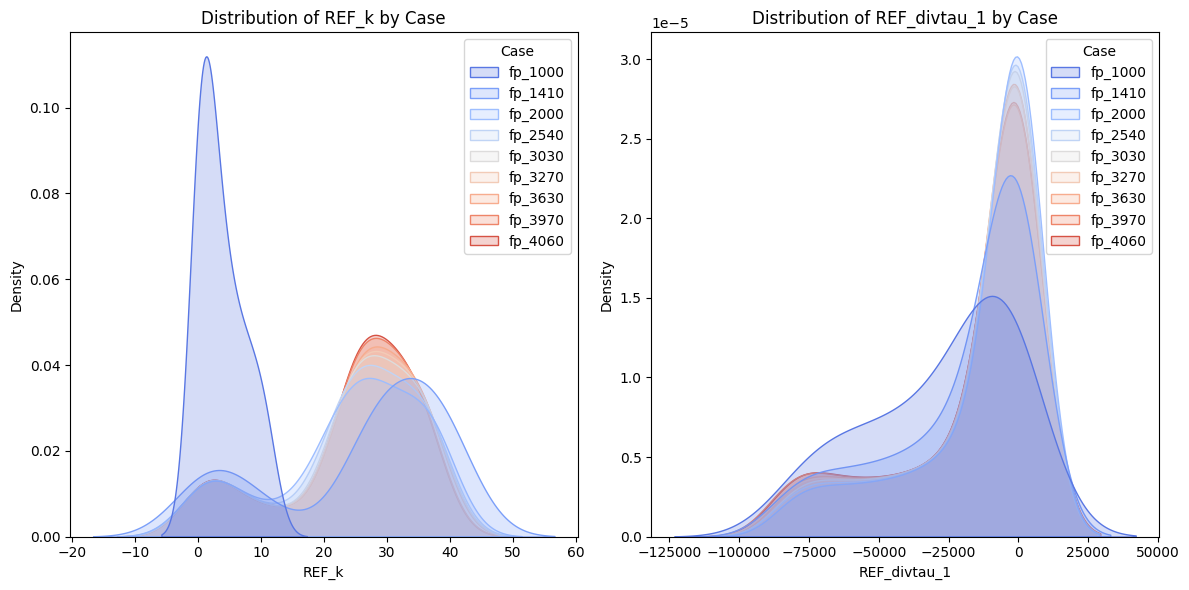

In [16]:
# Distribution plots of 'REF_k' and 'REF_divtau_1' by class (target variable)
plt.figure(figsize=(12, 6))

# Plot for 'REF_k'
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="REF_k", hue=target, fill=True, common_norm=False, palette='coolwarm')
plt.title(f"Distribution of REF_k by {target}")

# Plot for 'REF_divtau_1'
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="REF_divtau_1", hue=target, fill=True, common_norm=False, palette='coolwarm')
plt.title(f"Distribution of REF_divtau_1 by {target}")

plt.tight_layout()
plt.show()

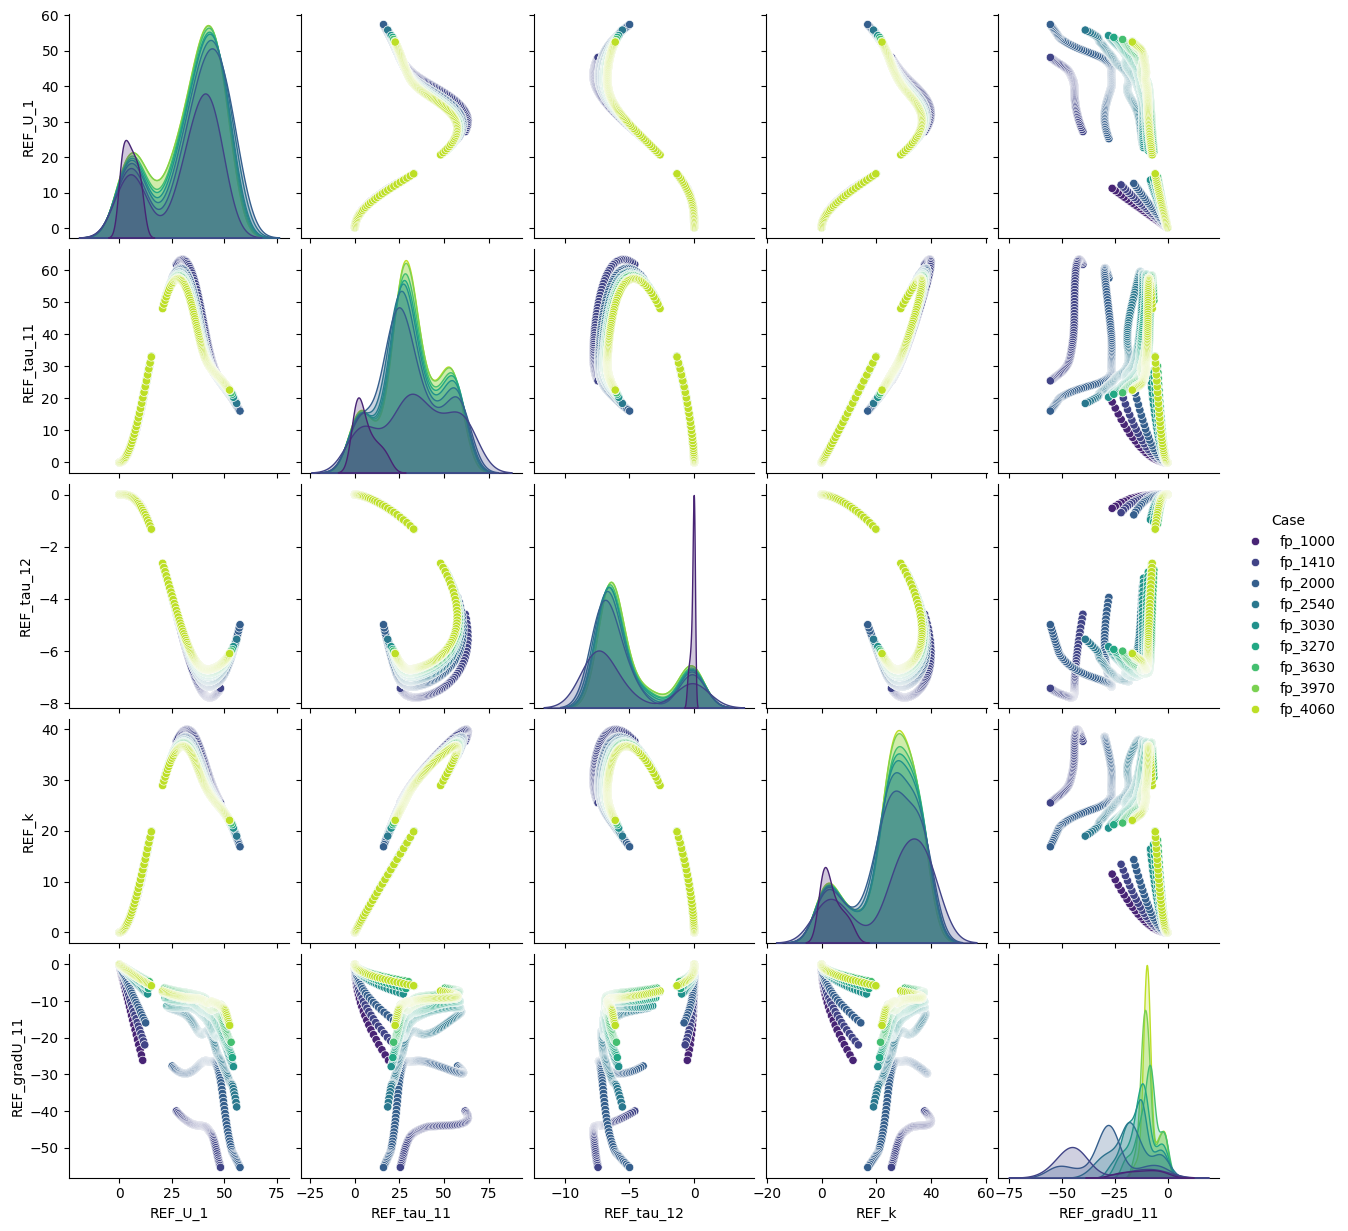

In [17]:
# Pairplot for the first 5 features
sns.pairplot(df[features[:5] + [target]], hue=target, palette='viridis')
plt.show()

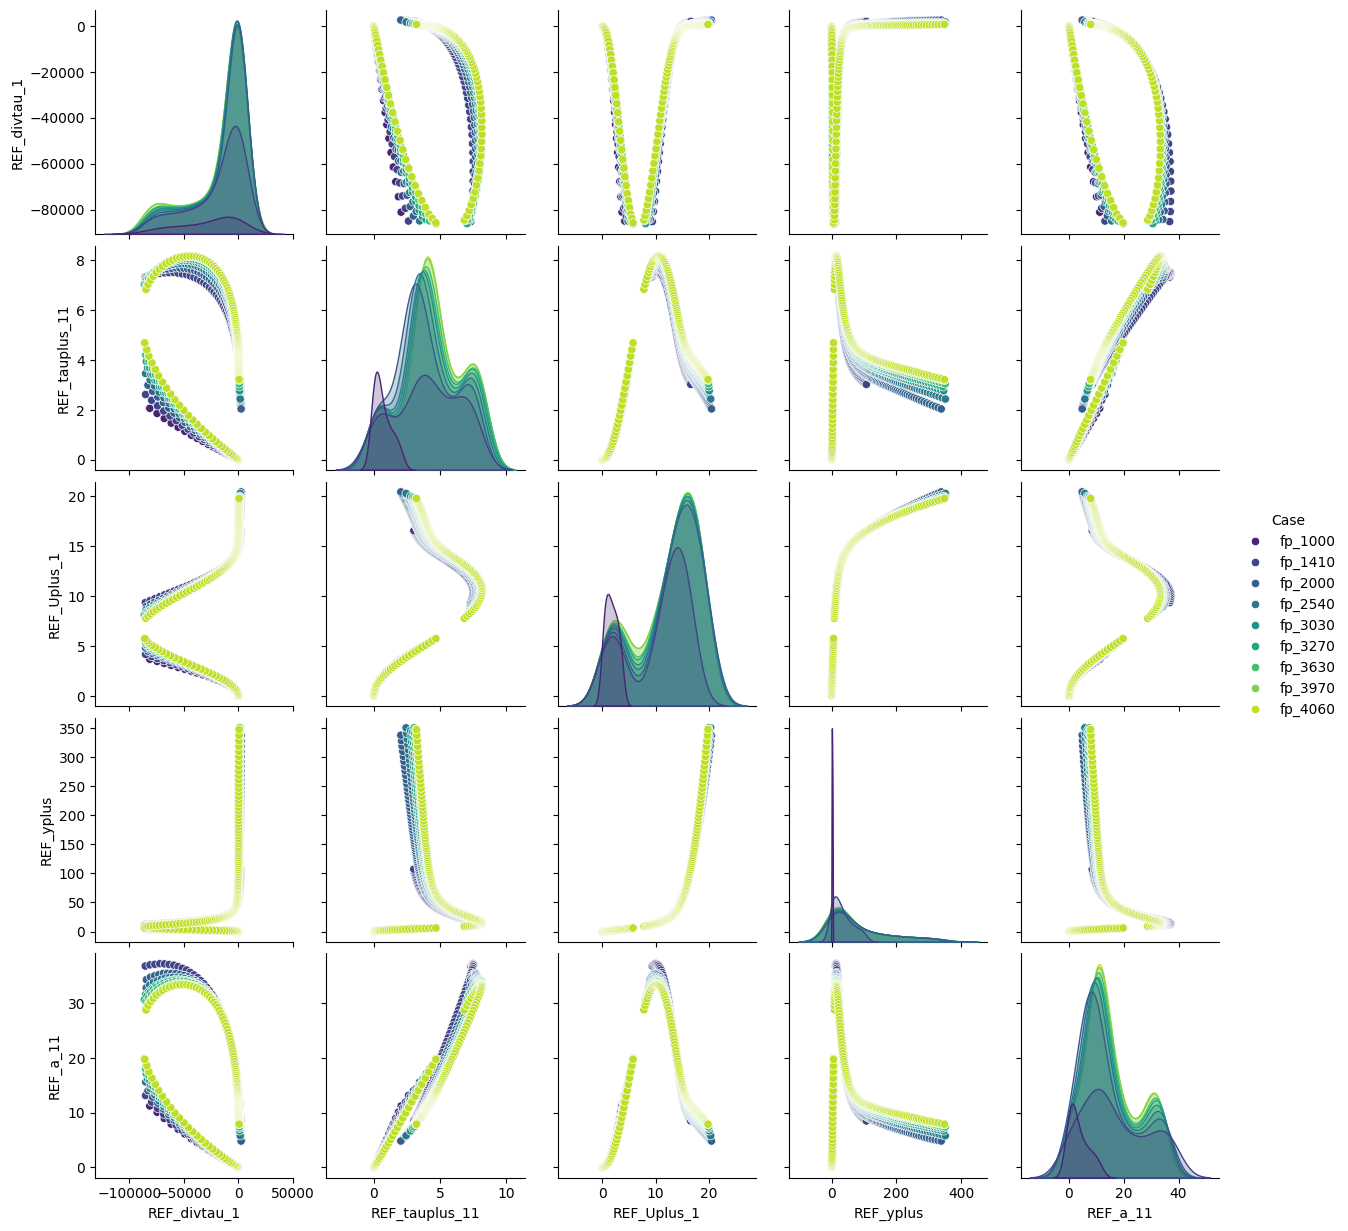

In [18]:
# Pairplot for the next 5 features (if there are at least 10 features)
if len(features) > 5:
    sns.pairplot(df[features[5:10] + [target]], hue=target, palette='viridis')
    plt.show()

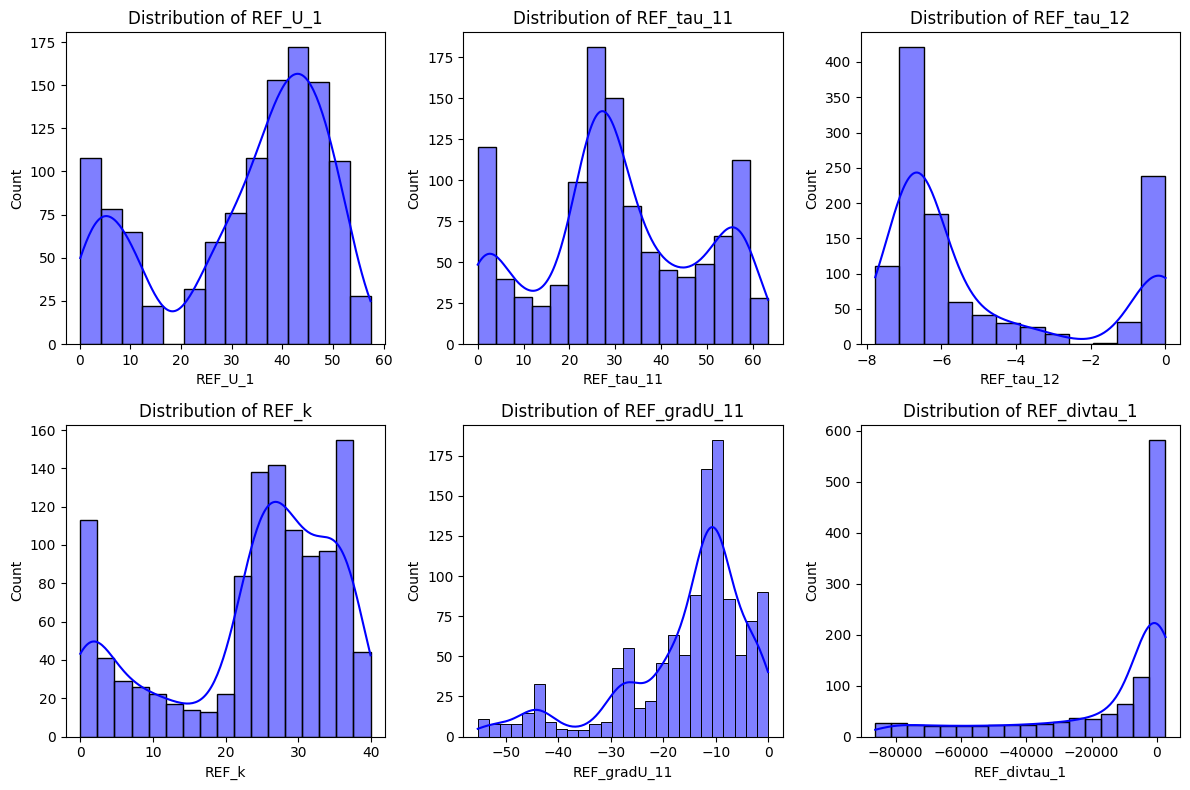

In [19]:
# Distribution plots
plt.figure(figsize=(12,8))
for i, feature in enumerate(features[:6]):  # Limiting to first 6 for readability
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

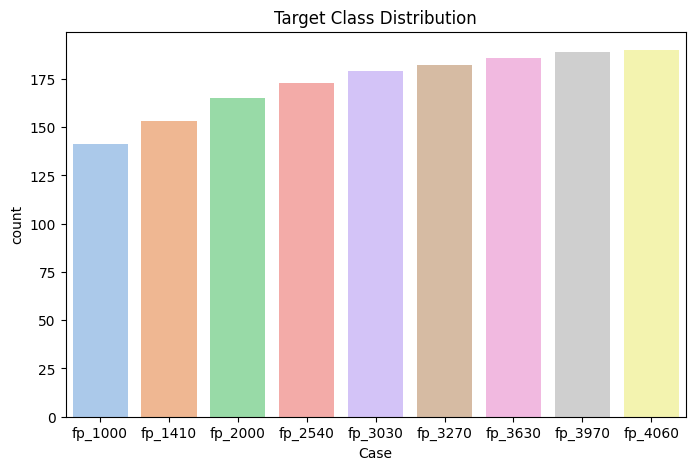

In [20]:
# Checking class distribution
plt.figure(figsize=(8,5))
sns.countplot(x=y, hue=y, palette='pastel', legend=False)
plt.title("Target Class Distribution")
plt.show()

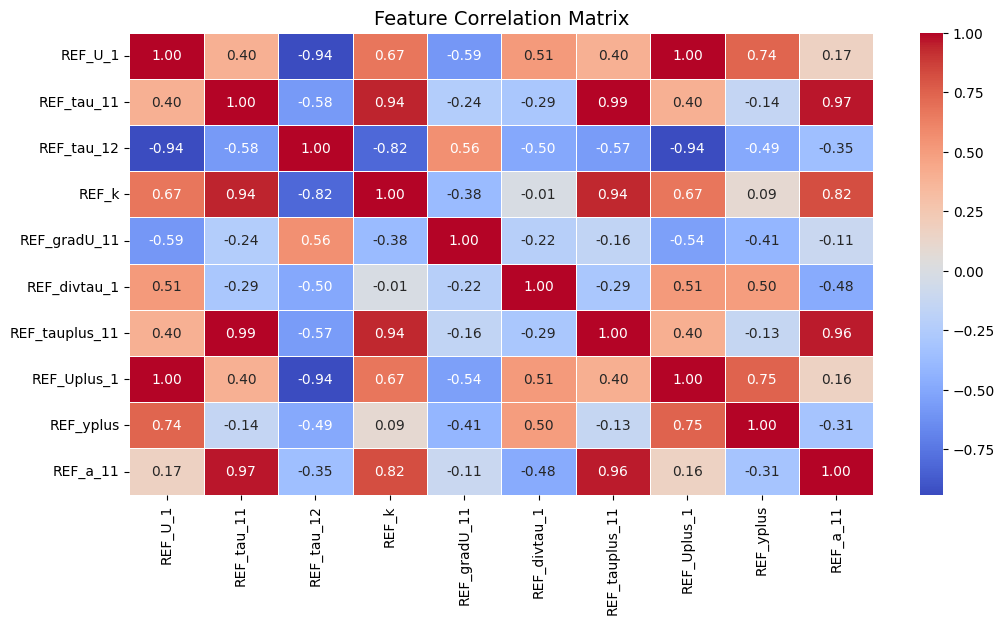

In [21]:
# Data Visualization
plt.figure(figsize=(12,6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.show()

In [22]:
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
y

array([0, 0, 0, ..., 8, 8, 8])

# Step5: Split Dataset into Train and Test

In [24]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step6: Model Training, Prediction and Evaluation

### Random Forest

In [26]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
rf_y_pred = rf_model.predict(X_test)
rf_y_pred

array([3, 7, 6, 2, 6, 0, 0, 6, 4, 7, 5, 7, 7, 7, 5, 2, 5, 1, 4, 6, 2, 7,
       8, 8, 1, 8, 5, 5, 0, 6, 5, 2, 6, 1, 3, 4, 3, 5, 5, 4, 3, 3, 7, 0,
       5, 6, 3, 3, 5, 2, 8, 7, 7, 1, 8, 5, 7, 5, 4, 1, 8, 1, 5, 7, 8, 6,
       3, 5, 7, 3, 5, 6, 8, 7, 8, 6, 7, 8, 8, 2, 4, 2, 7, 6, 2, 7, 1, 2,
       1, 3, 7, 5, 8, 6, 6, 3, 2, 1, 5, 0, 2, 6, 8, 8, 7, 2, 1, 8, 5, 7,
       7, 5, 2, 6, 5, 4, 2, 2, 4, 6, 1, 2, 7, 6, 4, 1, 8, 5, 3, 8, 5, 3,
       2, 7, 1, 7, 3, 7, 7, 2, 4, 6, 1, 4, 2, 0, 8, 8, 7, 7, 7, 8, 1, 2,
       0, 3, 7, 5, 7, 0, 4, 4, 1, 2, 8, 2, 1, 2, 1, 4, 6, 6, 6, 1, 8, 5,
       5, 3, 5, 6, 3, 5, 7, 3, 8, 8, 0, 4, 3, 8, 7, 5, 5, 7, 7, 0, 2, 7,
       4, 8, 4, 4, 6, 4, 1, 4, 0, 6, 7, 2, 6, 0, 4, 1, 4, 7, 7, 8, 0, 4,
       7, 6, 0, 6, 6, 7, 4, 4, 3, 6, 3, 6, 4, 6, 1, 3, 4, 0, 0, 3, 4, 2,
       0, 4, 0, 5, 7, 2, 6, 6, 4, 7, 5, 7, 1, 5, 1, 2, 2, 5, 0, 2, 4, 5,
       2, 7, 8, 6, 1, 3, 1, 8, 7, 7, 1, 2, 5, 7, 2, 4, 8, 2, 5, 6, 4, 8,
       2, 4, 0, 8, 2, 1, 7, 8, 3, 4, 1, 8, 2, 2, 5,

In [28]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 0.6987179487179487
              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.79      0.74      0.77        31
           2       0.80      0.97      0.88        33
           3       0.81      0.63      0.71        35
           4       0.54      0.56      0.55        36
           5       0.65      0.67      0.66        36
           6       0.80      0.76      0.78        37
           7       0.52      0.66      0.58        38
           8       0.60      0.55      0.58        38

    accuracy                           0.70       312
   macro avg       0.72      0.71      0.71       312
weighted avg       0.71      0.70      0.70       312



### XGBoost

In [29]:
# Train and evaluate XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [30]:
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_pred

array([3, 8, 5, 2, 5, 0, 0, 5, 4, 4, 5, 7, 7, 7, 5, 2, 5, 1, 4, 6, 2, 7,
       8, 8, 1, 8, 5, 4, 0, 6, 5, 2, 6, 1, 3, 2, 3, 5, 5, 4, 3, 3, 7, 0,
       5, 6, 3, 3, 5, 2, 2, 8, 7, 1, 8, 5, 7, 7, 4, 1, 8, 1, 5, 7, 2, 6,
       3, 5, 7, 3, 6, 6, 8, 7, 8, 6, 7, 8, 2, 0, 4, 2, 7, 5, 2, 7, 1, 2,
       1, 3, 6, 5, 8, 6, 5, 3, 2, 1, 4, 0, 2, 6, 8, 8, 8, 2, 1, 8, 4, 7,
       7, 5, 2, 6, 4, 4, 2, 3, 5, 6, 1, 2, 7, 6, 4, 1, 2, 3, 3, 8, 4, 3,
       4, 7, 1, 7, 3, 8, 7, 2, 4, 5, 2, 4, 2, 0, 8, 8, 7, 7, 7, 8, 1, 2,
       0, 3, 7, 7, 8, 0, 4, 4, 1, 2, 8, 2, 1, 2, 1, 4, 6, 6, 6, 1, 8, 5,
       5, 3, 5, 6, 3, 5, 7, 2, 8, 8, 0, 4, 3, 8, 7, 5, 5, 7, 7, 0, 2, 7,
       4, 8, 4, 4, 6, 4, 1, 4, 0, 6, 7, 2, 6, 0, 4, 1, 4, 7, 7, 8, 0, 4,
       7, 6, 0, 6, 6, 7, 4, 5, 3, 6, 3, 6, 4, 6, 1, 3, 4, 0, 0, 3, 4, 2,
       0, 4, 0, 5, 8, 2, 6, 6, 4, 7, 4, 7, 1, 5, 1, 2, 2, 5, 0, 2, 4, 5,
       2, 7, 8, 6, 1, 3, 1, 8, 7, 7, 1, 0, 5, 7, 2, 4, 8, 2, 5, 6, 4, 8,
       2, 5, 0, 8, 0, 1, 7, 7, 3, 4, 1, 8, 2, 2, 7,

In [31]:
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_y_pred))
print(classification_report(y_test, xgb_y_pred))

XGBoost Accuracy: 0.6730769230769231
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.82      0.74      0.78        31
           2       0.74      0.94      0.83        33
           3       0.79      0.63      0.70        35
           4       0.51      0.58      0.55        36
           5       0.54      0.53      0.54        36
           6       0.84      0.70      0.76        37
           7       0.50      0.58      0.54        38
           8       0.64      0.61      0.62        38

    accuracy                           0.67       312
   macro avg       0.69      0.68      0.68       312
weighted avg       0.68      0.67      0.67       312



### SVM

In [32]:
# Train and evaluate SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [33]:
svm_y_pred = svm_model.predict(X_test)
svm_y_pred

array([3, 8, 2, 2, 2, 0, 0, 2, 3, 2, 6, 6, 8, 8, 5, 2, 3, 1, 5, 7, 2, 8,
       8, 8, 1, 8, 6, 5, 0, 8, 7, 2, 8, 1, 3, 2, 3, 5, 5, 4, 3, 6, 2, 0,
       4, 7, 3, 2, 5, 2, 2, 8, 8, 1, 8, 3, 2, 4, 5, 1, 7, 2, 7, 2, 2, 7,
       3, 5, 8, 3, 6, 8, 4, 8, 8, 8, 8, 6, 2, 2, 3, 2, 6, 5, 2, 8, 1, 2,
       1, 3, 7, 5, 8, 7, 2, 4, 2, 1, 5, 0, 2, 7, 8, 8, 7, 2, 1, 8, 5, 8,
       2, 5, 2, 7, 5, 2, 2, 2, 4, 7, 1, 4, 7, 8, 2, 2, 2, 2, 3, 7, 4, 4,
       6, 8, 1, 6, 4, 7, 3, 2, 5, 5, 6, 2, 2, 0, 8, 7, 8, 8, 8, 7, 1, 2,
       0, 3, 3, 7, 8, 0, 7, 4, 2, 2, 8, 2, 1, 2, 1, 4, 7, 8, 8, 1, 7, 5,
       7, 3, 7, 8, 4, 5, 8, 2, 4, 8, 0, 7, 3, 7, 7, 5, 3, 8, 7, 0, 2, 8,
       5, 7, 6, 3, 5, 5, 2, 5, 0, 4, 8, 2, 8, 0, 4, 1, 5, 8, 8, 7, 0, 4,
       8, 7, 0, 5, 7, 7, 4, 5, 4, 6, 2, 8, 3, 8, 1, 4, 6, 0, 0, 3, 4, 2,
       0, 5, 0, 5, 2, 2, 4, 8, 2, 8, 5, 6, 1, 5, 1, 2, 2, 5, 1, 2, 5, 7,
       2, 7, 8, 4, 1, 3, 1, 8, 7, 6, 2, 2, 3, 7, 2, 4, 8, 2, 8, 8, 3, 4,
       3, 5, 0, 7, 2, 1, 8, 6, 3, 3, 1, 7, 2, 2, 3,

In [34]:
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

SVM Accuracy: 0.3974358974358974
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        28
           1       0.96      0.74      0.84        31
           2       0.44      0.88      0.59        33
           3       0.50      0.43      0.46        35
           4       0.07      0.06      0.06        36
           5       0.35      0.33      0.34        36
           6       0.00      0.00      0.00        37
           7       0.16      0.16      0.16        38
           8       0.27      0.39      0.32        38

    accuracy                           0.40       312
   macro avg       0.42      0.42      0.41       312
weighted avg       0.39      0.40      0.38       312



### Logistic Regression

In [35]:
# Train and evaluate Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [36]:
log_reg_y_pred = log_reg_model.predict(X_test)
log_reg_y_pred

array([3, 8, 7, 1, 7, 0, 0, 7, 4, 7, 5, 6, 8, 8, 5, 1, 7, 1, 5, 8, 2, 7,
       8, 8, 1, 8, 5, 5, 0, 7, 6, 2, 6, 1, 3, 7, 4, 5, 5, 5, 3, 5, 7, 0,
       5, 8, 3, 5, 5, 7, 7, 8, 8, 1, 8, 7, 7, 4, 5, 1, 7, 7, 5, 7, 7, 6,
       3, 5, 6, 3, 7, 7, 6, 8, 8, 8, 8, 7, 7, 0, 4, 2, 6, 6, 2, 8, 1, 2,
       1, 3, 7, 5, 8, 7, 7, 3, 2, 1, 5, 0, 2, 8, 8, 8, 7, 2, 1, 8, 5, 7,
       7, 5, 2, 7, 5, 7, 2, 2, 6, 7, 1, 2, 7, 6, 7, 2, 7, 7, 3, 7, 5, 3,
       2, 8, 1, 7, 3, 7, 4, 1, 4, 6, 2, 7, 2, 0, 8, 7, 6, 8, 6, 7, 1, 2,
       0, 3, 4, 4, 8, 0, 4, 5, 0, 2, 8, 2, 1, 0, 1, 4, 8, 8, 7, 1, 7, 5,
       7, 3, 7, 8, 3, 5, 8, 7, 6, 8, 0, 4, 3, 7, 8, 5, 7, 8, 7, 0, 2, 8,
       4, 7, 4, 4, 6, 5, 0, 4, 0, 6, 8, 2, 6, 0, 3, 1, 5, 8, 6, 8, 0, 3,
       8, 7, 0, 7, 7, 7, 4, 5, 3, 7, 7, 8, 4, 6, 1, 3, 4, 0, 0, 3, 4, 2,
       0, 5, 0, 5, 7, 2, 6, 6, 7, 8, 5, 6, 1, 5, 1, 2, 2, 5, 0, 2, 5, 6,
       2, 7, 8, 6, 1, 3, 1, 8, 7, 7, 0, 7, 7, 7, 2, 3, 8, 2, 7, 6, 4, 6,
       2, 5, 0, 8, 2, 1, 6, 6, 3, 4, 1, 7, 2, 2, 4,

In [37]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_y_pred))
print(classification_report(y_test, log_reg_y_pred))

Logistic Regression Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       1.00      0.84      0.91        31
           2       0.92      1.00      0.96        33
           3       1.00      0.74      0.85        35
           4       0.64      0.39      0.48        36
           5       0.47      0.47      0.47        36
           6       0.43      0.32      0.37        37
           7       0.17      0.29      0.21        38
           8       0.38      0.45      0.41        38

    accuracy                           0.58       312
   macro avg       0.66      0.60      0.62       312
weighted avg       0.64      0.58      0.60       312



### Decision Tree

In [38]:
# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
dt_y_pred = dt_model.predict(X_test)
dt_y_pred

array([3, 7, 5, 2, 7, 0, 0, 7, 4, 8, 4, 7, 7, 7, 5, 0, 5, 0, 4, 6, 2, 7,
       8, 8, 1, 8, 3, 5, 0, 6, 5, 2, 6, 1, 2, 5, 4, 5, 5, 6, 3, 3, 7, 0,
       5, 6, 2, 3, 5, 8, 8, 8, 7, 1, 8, 5, 7, 7, 4, 2, 8, 1, 5, 7, 8, 6,
       3, 4, 7, 3, 5, 6, 8, 8, 8, 6, 7, 8, 8, 1, 4, 2, 5, 6, 2, 7, 1, 2,
       0, 3, 6, 5, 8, 6, 5, 3, 2, 1, 5, 0, 2, 6, 7, 8, 7, 2, 1, 8, 5, 6,
       7, 5, 2, 6, 5, 4, 2, 2, 5, 6, 1, 2, 7, 6, 4, 1, 8, 3, 3, 8, 6, 3,
       1, 8, 1, 7, 3, 8, 7, 2, 4, 6, 1, 8, 2, 0, 7, 8, 7, 7, 7, 8, 1, 2,
       0, 2, 8, 8, 7, 0, 4, 6, 1, 2, 8, 2, 1, 1, 1, 4, 6, 6, 6, 1, 8, 5,
       5, 3, 5, 6, 3, 5, 7, 5, 8, 7, 0, 4, 3, 8, 7, 3, 5, 7, 7, 0, 2, 7,
       4, 8, 4, 4, 7, 5, 0, 4, 0, 7, 7, 2, 6, 0, 4, 1, 4, 7, 7, 8, 0, 4,
       7, 6, 0, 6, 6, 7, 4, 5, 3, 8, 3, 6, 4, 6, 1, 3, 4, 0, 0, 2, 4, 2,
       0, 4, 0, 4, 7, 2, 8, 6, 4, 7, 5, 7, 1, 3, 1, 2, 2, 5, 1, 2, 4, 5,
       2, 7, 8, 7, 1, 3, 1, 6, 7, 7, 0, 2, 5, 7, 3, 4, 8, 2, 5, 6, 3, 6,
       2, 5, 0, 8, 0, 1, 7, 5, 3, 4, 1, 8, 2, 2, 7,

In [40]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

Decision Tree Accuracy: 0.6762820512820513
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.76      0.71      0.73        31
           2       0.79      0.91      0.85        33
           3       0.67      0.51      0.58        35
           4       0.56      0.50      0.53        36
           5       0.61      0.61      0.61        36
           6       0.85      0.76      0.80        37
           7       0.55      0.71      0.62        38
           8       0.57      0.61      0.59        38

    accuracy                           0.68       312
   macro avg       0.69      0.68      0.68       312
weighted avg       0.68      0.68      0.67       312



# Step7: Comparison of Trained Models

In [41]:
# Create a DataFrame to store the comparison results
model_comparison = {
    "Model": ["Random Forest", "XGBoost", "SVM", "Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, rf_y_pred),
        accuracy_score(y_test, xgb_y_pred),
        accuracy_score(y_test, svm_y_pred),
        accuracy_score(y_test, log_reg_y_pred),
        accuracy_score(y_test, dt_y_pred)
    ],
    "Precision (macro)": [
        classification_report(y_test, rf_y_pred, output_dict=True)['macro avg']['precision'],
        classification_report(y_test, xgb_y_pred, output_dict=True)['macro avg']['precision'],
        classification_report(y_test, svm_y_pred, output_dict=True)['macro avg']['precision'],
        classification_report(y_test, log_reg_y_pred, output_dict=True)['macro avg']['precision'],
        classification_report(y_test, dt_y_pred, output_dict=True)['macro avg']['precision']
    ],
    "Recall (macro)": [
        classification_report(y_test, rf_y_pred, output_dict=True)['macro avg']['recall'],
        classification_report(y_test, xgb_y_pred, output_dict=True)['macro avg']['recall'],
        classification_report(y_test, svm_y_pred, output_dict=True)['macro avg']['recall'],
        classification_report(y_test, log_reg_y_pred, output_dict=True)['macro avg']['recall'],
        classification_report(y_test, dt_y_pred, output_dict=True)['macro avg']['recall']
    ],
    "F1-Score (macro)": [
        classification_report(y_test, rf_y_pred, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, xgb_y_pred, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, svm_y_pred, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, log_reg_y_pred, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, dt_y_pred, output_dict=True)['macro avg']['f1-score']
    ]
}

In [42]:
# Convert to DataFrame for better visualization
comparison_df = pd.DataFrame(model_comparison)

# Display the results table
print(comparison_df)

                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0        Random Forest  0.698718           0.719586        0.705682   
1              XGBoost  0.673077           0.692193        0.681039   
2                  SVM  0.397436           0.417263        0.419614   
3  Logistic Regression  0.583333           0.658823        0.603602   
4        Decision Tree  0.676282           0.687145        0.682016   

   F1-Score (macro)  
0          0.708630  
1          0.682743  
2          0.405621  
3          0.621919  
4          0.681270  


# Step8: Save the Best Model

In [43]:
# Save the best model (Based on accuracy or another criteria)
best_model = dt_model  # Update this with the actual best model after comparison
joblib.dump(best_model, "best_model.pkl")
print(f"Best model saved: {type(best_model).__name__}")

Best model saved: DecisionTreeClassifier
